## Advanced Regression Assignment - House Price Prediction (Part I)

##### Problem Statement:

A US-Based housing company, Surprise Housing has decided to enter the Australian market. The company is looking at prospective properties to buy to enter the market. The business model of the company is that it purchase houses at a price below their actual values and flip them on at a higher price. 

The company wants to build a model to predict the actual value of the prospective properties and decide whether to invest in them or not.

##### Goal: 

Build a regression model using regularisation and find:
1. Which variables are significant in predicting the price of a house, and 
2. How well those variables describe the price of a house

Also, determine the optimal value of lambda and lasso regression.

#### The solution is divided into the following sections: 

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data

house = pd.read_csv("train.csv")

In [3]:
# Shape of the dataset

print(house.shape)

(1460, 81)


In [4]:
# Summary of the dataset

print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Sample rows

pd.set_option('display.max_columns', None)   # This command releases restriction on max columns display
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
# Display statistical summary of the data, especially for continuous variables

house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

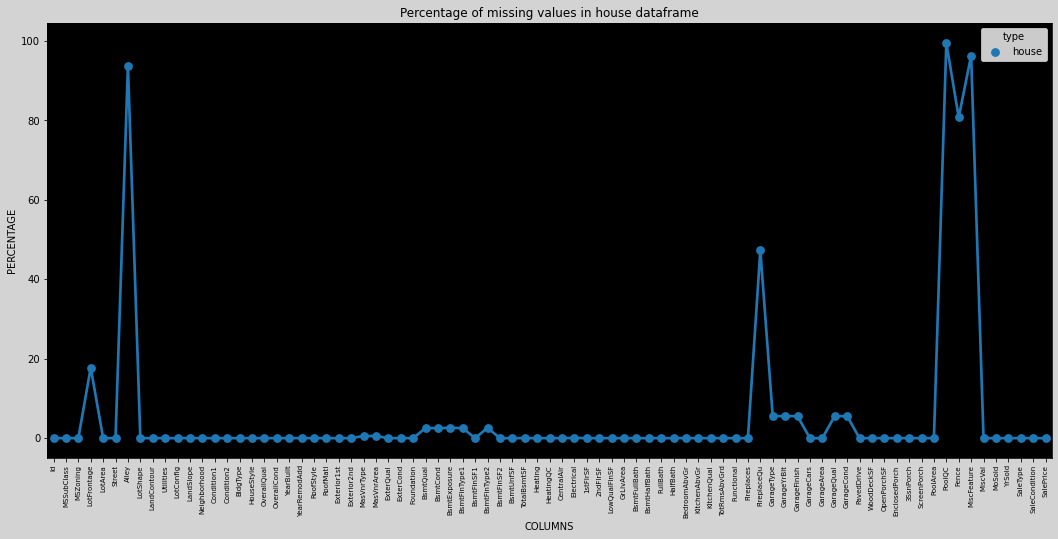

In [7]:
# Display percentage of missing values in the dataframe

fig = plt.figure(figsize=(18,8))
miss_house = pd.DataFrame((house.isnull().sum())*100/house.shape[0]).reset_index()
miss_house["type"] = "house"
ax = sns.pointplot("index",0,data=miss_house,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of missing values in house dataframe")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

##### Need to check columns below as they have zero or missing values: 

In [8]:
def missing_zero_values_table(house):
        zero_val = (house == 0.00).astype(int).sum(axis=0)
        mis_val = house.isnull().sum()
        mis_val_percent = 100 * house.isnull().sum() / len(house)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(house)
        mz_table['Data Type'] = house.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("The dataframe has " + str(house.shape[1]) + " columns and " + str(house.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#        mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(house)

The dataframe has 81 columns and 1460 Rows.
There are 19 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
PoolQC                  0            1453               99.5   
MiscFeature             0            1406               96.3   
Alley                   0            1369               93.8   
Fence                   0            1179               80.8   
FireplaceQu             0             690               47.3   
LotFrontage             0             259               17.7   
GarageType              0              81                5.5   
GarageYrBlt             0              81                5.5   
GarageFinish            0              81                5.5   
GarageQual              0              81                5.5   
GarageCond              0              81                5.5   
BsmtExposure            0              38                2.6   
BsmtFinType2            0              38                2.6   
BsmtFinType1            0              37                2.5   
BsmtCond                0              37                2.5   
BsmtQual                0              37                2.5   
MasVnrArea            861               8                0.5   
MasVnrType              0               8                0.5   
Electrical              0               1                0.1   

              Total Zero Missing Values  % Total Zero Missing Values Data Type  
PoolQC                             1453                         99.5    object  
MiscFeature                        1406                         96.3    object  
Alley                              1369                         93.8    object  
Fence                              1179                         80.8    object  
FireplaceQu                         690                         47.3    object  
LotFrontage                         259                         17.7   float64  
GarageType                           81                          5.5    object  
GarageYrBlt                          81                          5.5   float64  
GarageFinish                         81                          5.5    object  
GarageQual                           81                          5.5    object  
GarageCond                           81                          5.5    object  
BsmtExposure                         38                          2.6    object  
BsmtFinType2                         38                          2.6    object  
BsmtFinType1                         37                          2.5    object  
BsmtCond                             37                          2.5    object  
BsmtQual                             37                          2.5    object  
MasVnrArea                          869                         59.5   float64  
MasVnrType                            8                          0.5    object  
Electrical                            1                          0.1    object

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

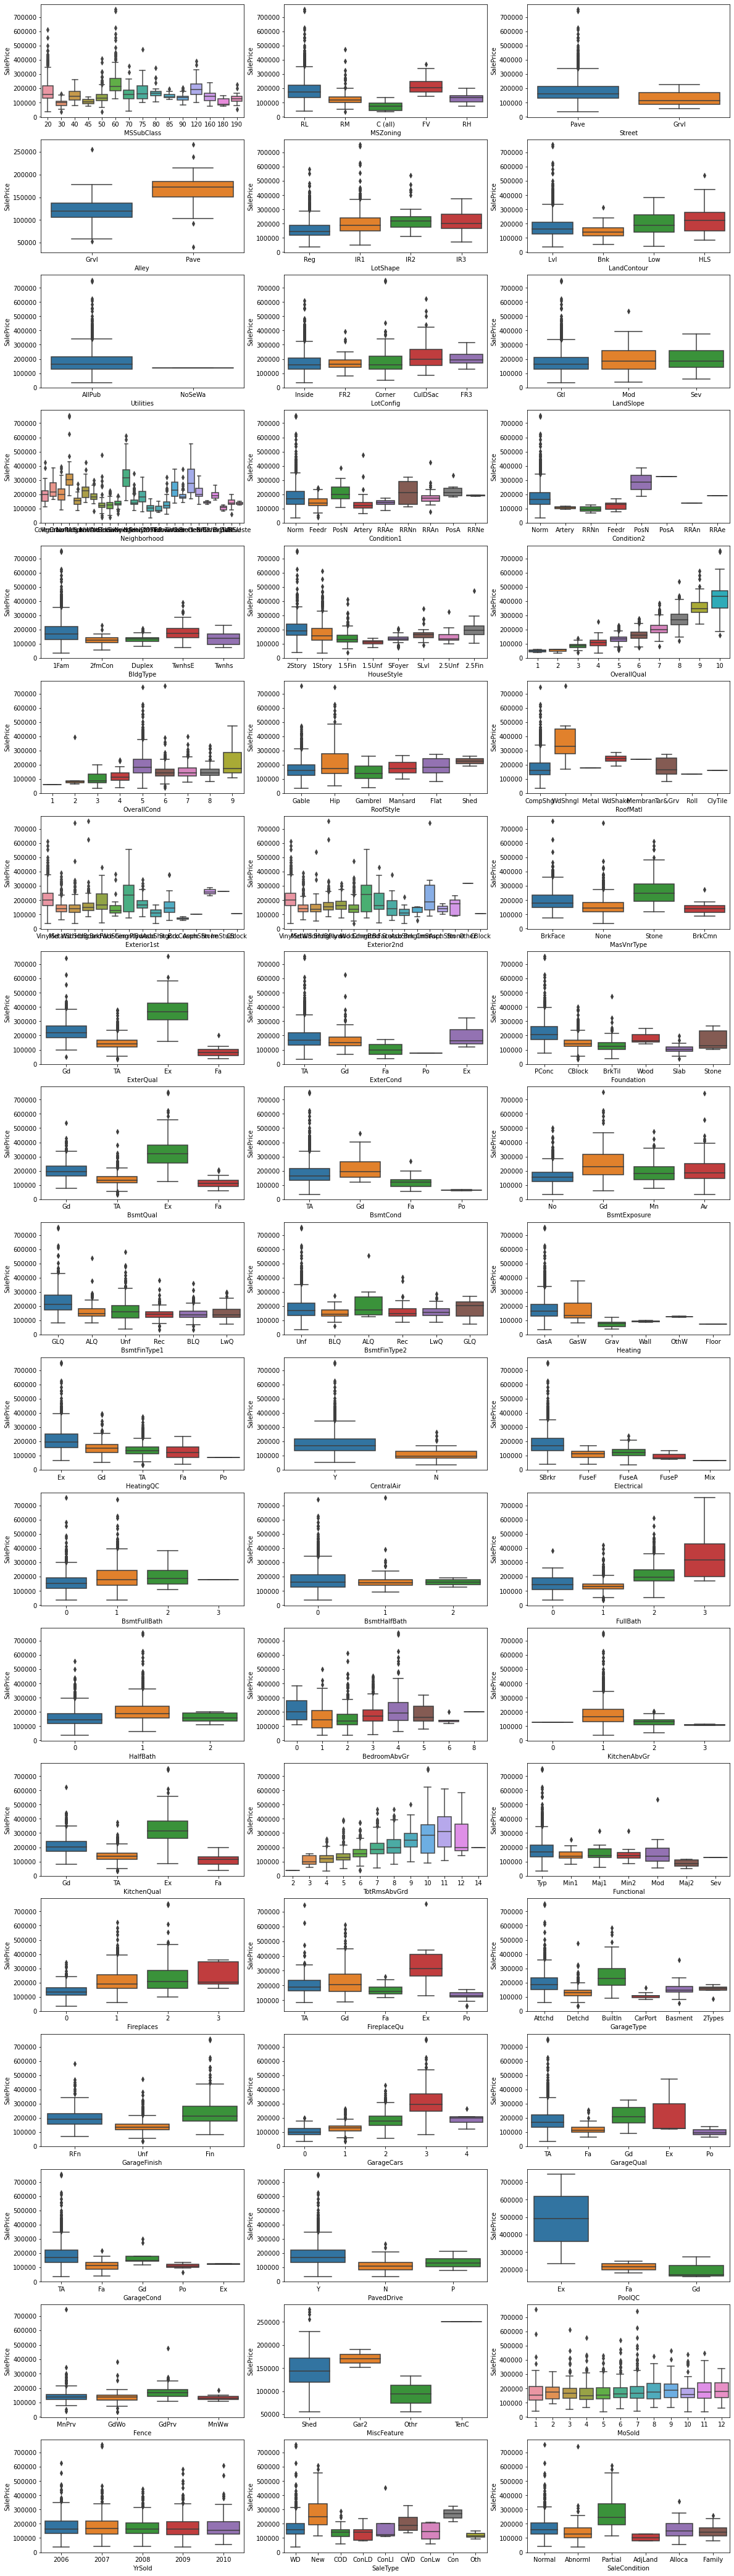

In [9]:
# Visualize categorical variables

plt.figure(figsize=(20,84))

plt.subplot(21,3,1)
sns.boxplot(x='MSSubClass', y='SalePrice', data=house)

plt.subplot(21,3,2)
sns.boxplot(x='MSZoning', y='SalePrice', data=house)

plt.subplot(21,3,3)
sns.boxplot(x='Street', y='SalePrice', data=house)

plt.subplot(21,3,4)
sns.boxplot(x='Alley', y='SalePrice', data=house)

plt.subplot(21,3,5)
sns.boxplot(x='LotShape', y='SalePrice', data=house)

plt.subplot(21,3,6)
sns.boxplot(x='LandContour', y='SalePrice', data=house)

plt.subplot(21,3,7)
sns.boxplot(x='Utilities', y='SalePrice', data=house)

plt.subplot(21,3,8)
sns.boxplot(x='LotConfig', y='SalePrice', data=house)

plt.subplot(21,3,9)
sns.boxplot(x='LandSlope', y='SalePrice', data=house)

plt.subplot(21,3,10)
sns.boxplot(x='Neighborhood', y='SalePrice', data=house)

plt.subplot(21,3,11)
sns.boxplot(x='Condition1', y='SalePrice', data=house)

plt.subplot(21,3,12)
sns.boxplot(x='Condition2', y='SalePrice', data=house)

plt.subplot(21,3,13)
sns.boxplot(x='BldgType', y='SalePrice', data=house)

plt.subplot(21,3,14)
sns.boxplot(x='HouseStyle', y='SalePrice', data=house)

plt.subplot(21,3,15)
sns.boxplot(x='OverallQual', y='SalePrice', data=house)

plt.subplot(21,3,16)
sns.boxplot(x='OverallCond', y='SalePrice', data=house)

plt.subplot(21,3,17)
sns.boxplot(x='RoofStyle', y='SalePrice', data=house)

plt.subplot(21,3,18)
sns.boxplot(x='RoofMatl', y='SalePrice', data=house)

plt.subplot(21,3,19)
sns.boxplot(x='Exterior1st', y='SalePrice', data=house)

plt.subplot(21,3,20)
sns.boxplot(x='Exterior2nd', y='SalePrice', data=house)

plt.subplot(21,3,21)
sns.boxplot(x='MasVnrType', y='SalePrice', data=house)

plt.subplot(21,3,22)
sns.boxplot(x='ExterQual', y='SalePrice', data=house)

plt.subplot(21,3,23)
sns.boxplot(x='ExterCond', y='SalePrice', data=house)

plt.subplot(21,3,24)
sns.boxplot(x='Foundation', y='SalePrice', data=house)

plt.subplot(21,3,25)
sns.boxplot(x='BsmtQual', y='SalePrice', data=house)

plt.subplot(21,3,26)
sns.boxplot(x='BsmtCond', y='SalePrice', data=house)

plt.subplot(21,3,27)
sns.boxplot(x='BsmtExposure', y='SalePrice', data=house)

plt.subplot(21,3,28)
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=house)

plt.subplot(21,3,29)
sns.boxplot(x='BsmtFinType2', y='SalePrice', data=house)

plt.subplot(21,3,30)
sns.boxplot(x='Heating', y='SalePrice', data=house)

plt.subplot(21,3,31)
sns.boxplot(x='HeatingQC', y='SalePrice', data=house)

plt.subplot(21,3,32)
sns.boxplot(x='CentralAir', y='SalePrice', data=house)

plt.subplot(21,3,33)
sns.boxplot(x='Electrical', y='SalePrice', data=house)

plt.subplot(21,3,34)
sns.boxplot(x='BsmtFullBath', y='SalePrice', data=house)

plt.subplot(21,3,35)
sns.boxplot(x='BsmtHalfBath', y='SalePrice', data=house)

plt.subplot(21,3,36)
sns.boxplot(x='FullBath', y='SalePrice', data=house)

plt.subplot(21,3,37)
sns.boxplot(x='HalfBath', y='SalePrice', data=house)

plt.subplot(21,3,38)
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=house)

plt.subplot(21,3,39)
sns.boxplot(x='KitchenAbvGr', y='SalePrice', data=house)

plt.subplot(21,3,40)
sns.boxplot(x='KitchenQual', y='SalePrice', data=house)

plt.subplot(21,3,41)
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=house)

plt.subplot(21,3,42)
sns.boxplot(x='Functional', y='SalePrice', data=house)

plt.subplot(21,3,43)
sns.boxplot(x='Fireplaces', y='SalePrice', data=house)

plt.subplot(21,3,44)
sns.boxplot(x='FireplaceQu', y='SalePrice', data=house)

plt.subplot(21,3,45)
sns.boxplot(x='GarageType', y='SalePrice', data=house)

plt.subplot(21,3,46)
sns.boxplot(x='GarageFinish', y='SalePrice', data=house)

plt.subplot(21,3,47)
sns.boxplot(x='GarageCars', y='SalePrice', data=house)

plt.subplot(21,3,48)
sns.boxplot(x='GarageQual', y='SalePrice', data=house)

plt.subplot(21,3,49)
sns.boxplot(x='GarageCond', y='SalePrice', data=house)

plt.subplot(21,3,50)
sns.boxplot(x='PavedDrive', y='SalePrice', data=house)

plt.subplot(21,3,51)
sns.boxplot(x='PoolQC', y='SalePrice', data=house)

plt.subplot(21,3,52)
sns.boxplot(x='Fence', y='SalePrice', data=house)

plt.subplot(21,3,53)
sns.boxplot(x='MiscFeature', y='SalePrice', data=house)

plt.subplot(21,3,54)
sns.boxplot(x='MoSold', y='SalePrice', data=house)

plt.subplot(21,3,55)
sns.boxplot(x='YrSold', y='SalePrice', data=house)

plt.subplot(21,3,56)
sns.boxplot(x='SaleType', y='SalePrice', data=house)

plt.subplot(21,3,57)
sns.boxplot(x='SaleCondition', y='SalePrice', data=house)

plt.show()

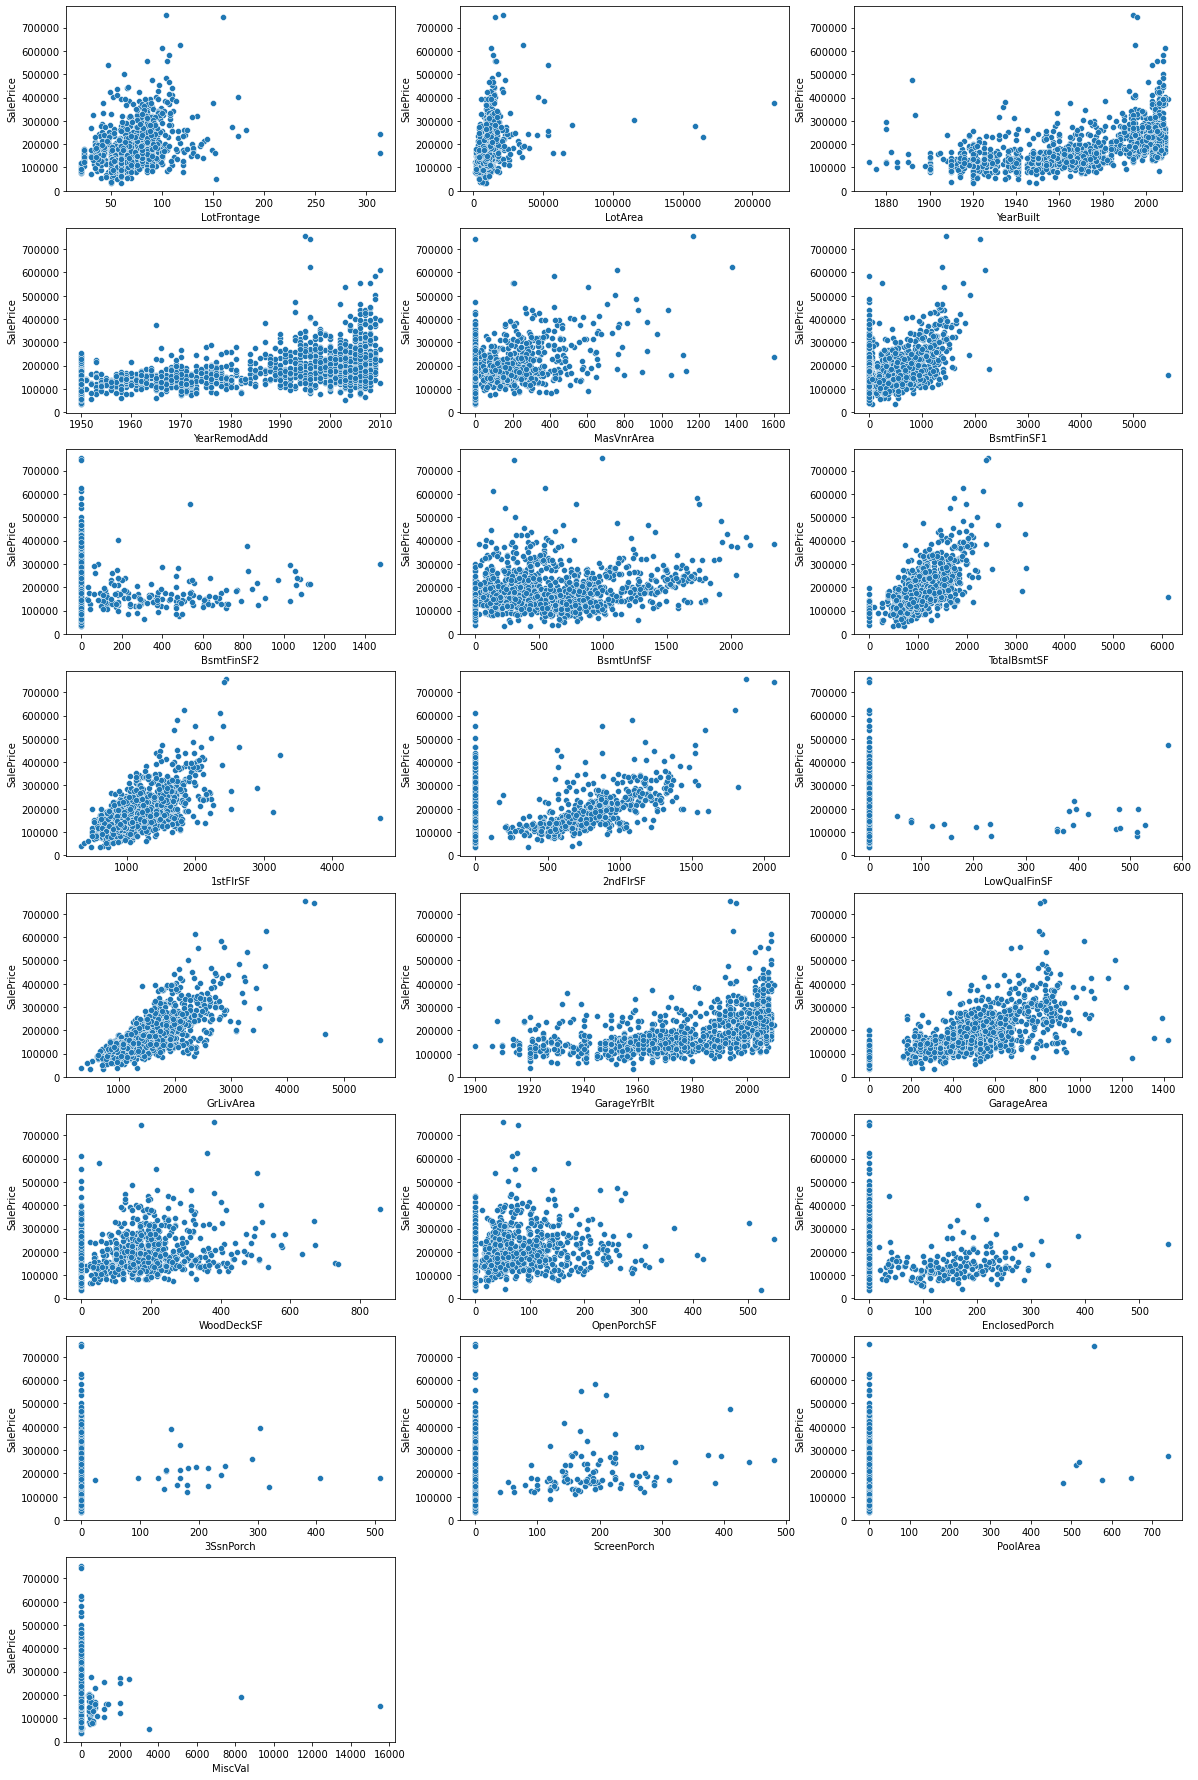

In [10]:
# Visualize continuous variables

plt.figure(figsize=(20,36))

plt.subplot(9,3,1)
sns.scatterplot(x='LotFrontage', y='SalePrice', data=house)

plt.subplot(9,3,2)
sns.scatterplot(x='LotArea', y='SalePrice', data=house)

plt.subplot(9,3,3)
sns.scatterplot(x='YearBuilt', y='SalePrice', data=house)

plt.subplot(9,3,4)
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=house)

plt.subplot(9,3,5)
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=house)

plt.subplot(9,3,6)
sns.scatterplot(x='BsmtFinSF1', y='SalePrice', data=house)

plt.subplot(9,3,7)
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=house)

plt.subplot(9,3,8)
sns.scatterplot(x='BsmtUnfSF', y='SalePrice', data=house)

plt.subplot(9,3,9)
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=house)

plt.subplot(9,3,10)
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=house)

plt.subplot(9,3,11)
sns.scatterplot(x='2ndFlrSF', y='SalePrice', data=house)

plt.subplot(9,3,12)
sns.scatterplot(x='LowQualFinSF', y='SalePrice', data=house)

plt.subplot(9,3,13)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=house)

plt.subplot(9,3,14)
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=house)

plt.subplot(9,3,15)
sns.scatterplot(x='GarageArea', y='SalePrice', data=house)

plt.subplot(9,3,16)
sns.scatterplot(x='WoodDeckSF', y='SalePrice', data=house)

plt.subplot(9,3,17)
sns.scatterplot(x='OpenPorchSF', y='SalePrice', data=house)

plt.subplot(9,3,18)
sns.scatterplot(x='EnclosedPorch', y='SalePrice', data=house)

plt.subplot(9,3,19)
sns.scatterplot(x='3SsnPorch', y='SalePrice', data=house)

plt.subplot(9,3,20)
sns.scatterplot(x='ScreenPorch', y='SalePrice', data=house)

plt.subplot(9,3,21)
sns.scatterplot(x='PoolArea', y='SalePrice', data=house)

plt.subplot(9,3,22)
sns.scatterplot(x='MiscVal', y='SalePrice', data=house)

plt.show()

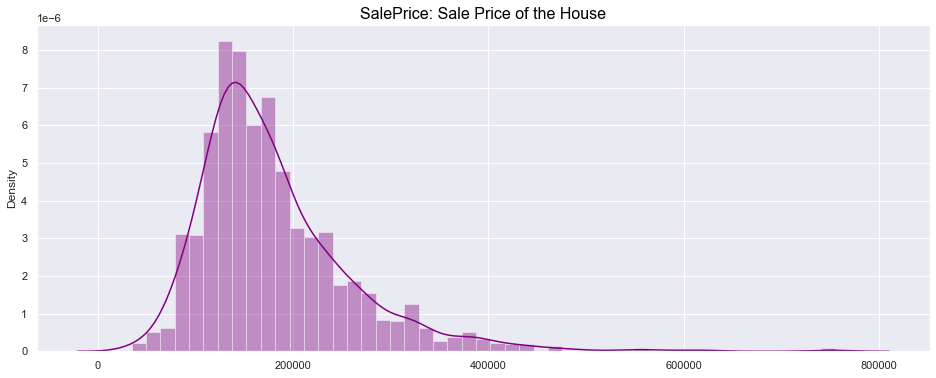

In [11]:
# [Column# 81] SalePrice: Sale Price of the House (target variable)

plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid", palette="pastel")
plt.title('SalePrice: Sale Price of the House', color='black', fontsize=16)
sns.distplot(house, x=house['SalePrice'], bins=None, color='purple')
plt.show()

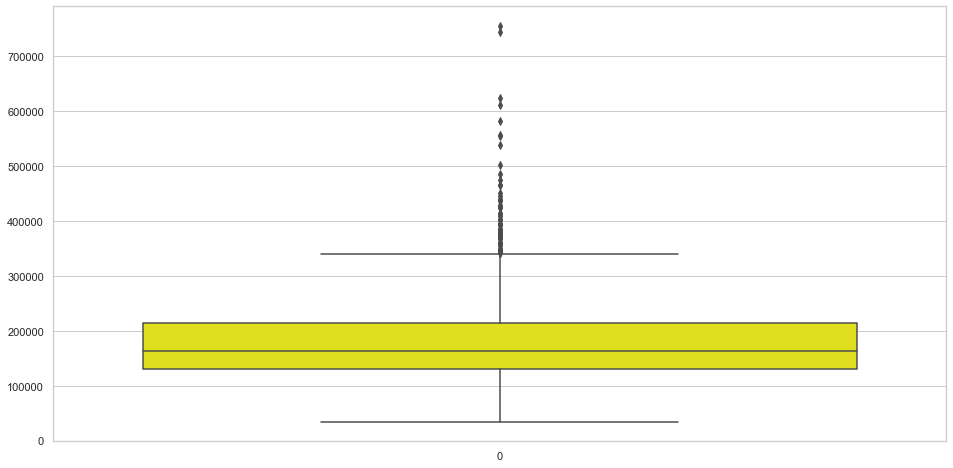

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
plt.figure(figsize=(16, 8))
sns.set_style('whitegrid')
sns.boxplot(data = house['SalePrice'], color='yellow')
plt.show()

house['SalePrice'].describe()

In [13]:
# All numeric (float and int) variables in the dataset

house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

Here, although the following variables are numeric (int), we'd rather treat it as categorical since it has only few discrete values. 

In [14]:
# dropping above numeric variables 

house_numeric = house_numeric.drop(['MSSubClass',
                                    'OverallQual',
                                    'OverallCond',
                                    'YearBuilt',
                                    'YearRemodAdd',
                                    'BsmtFullBath',
                                    'BsmtHalfBath',
                                    'FullBath',
                                    'HalfBath',
                                    'BedroomAbvGr',
                                    'KitchenAbvGr',
                                    'TotRmsAbvGrd',
                                    'Fireplaces',
                                    'GarageYrBlt',
                                    'MiscVal',
                                    'MoSold',
                                    'YrSold'], axis=1)
house_numeric.head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0   1         65.0     8450       196.0         706           0        150   
1   2         80.0     9600         0.0         978           0        284   
2   3         68.0    11250       162.0         486           0        434   
3   4         60.0     9550         0.0         216           0        540   
4   5         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageCars  \
0          856       856       854             0       1710           2   
1         1262      1262         0             0       1262           2   
2          920       920       866             0       1786           2   
3          756       961       756             0       1717           3   
4         1145      1145      1053             0       2198           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  SalePrice  
0         0     208500  
1         0     181500  
2         0     223500  
3         0     140000  
4         0     250000

In [15]:
# correlation matrix

cor = house_numeric.corr()
cor

Id  LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  \
Id             1.000000    -0.010601 -0.033226   -0.050298   -0.005024   
LotFrontage   -0.010601     1.000000  0.426095    0.193458    0.233633   
LotArea       -0.033226     0.426095  1.000000    0.104160    0.214103   
MasVnrArea    -0.050298     0.193458  0.104160    1.000000    0.264736   
BsmtFinSF1    -0.005024     0.233633  0.214103    0.264736    1.000000   
BsmtFinSF2    -0.005968     0.049900  0.111170   -0.072319   -0.050117   
BsmtUnfSF     -0.007940     0.132644 -0.002618    0.114442   -0.495251   
TotalBsmtSF   -0.015415     0.392075  0.260833    0.363936    0.522396   
1stFlrSF       0.010496     0.457181  0.299475    0.344501    0.445863   
2ndFlrSF       0.005590     0.080177  0.050986    0.174561   -0.137079   
LowQualFinSF  -0.044230     0.038469  0.004779   -0.069071   -0.064503   
GrLivArea      0.008273     0.402797  0.263116    0.390857    0.208171   
GarageCars     0.016570     0.285691  0.154871    0.364204    0.224054   
GarageArea     0.017634     0.344997  0.180403    0.373066    0.296970   
WoodDeckSF    -0.029643     0.088521  0.171698    0.159718    0.204306   
OpenPorchSF   -0.000477     0.151972  0.084774    0.125703    0.111761   
EnclosedPorch  0.002889     0.010700 -0.018340   -0.110204   -0.102303   
3SsnPorch     -0.046635     0.070029  0.020423    0.018796    0.026451   
ScreenPorch    0.001330     0.041383  0.043160    0.061466    0.062021   
PoolArea       0.057044     0.206167  0.077672    0.011723    0.140491   
SalePrice     -0.021917     0.351799  0.263843    0.477493    0.386420   

               BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
Id              -0.005968  -0.007940    -0.015415  0.010496  0.005590   
LotFrontage      0.049900   0.132644     0.392075  0.457181  0.080177   
LotArea          0.111170  -0.002618     0.260833  0.299475  0.050986   
MasVnrArea      -0.072319   0.114442     0.363936  0.344501  0.174561   
BsmtFinSF1      -0.050117  -0.495251     0.522396  0.445863 -0.137079   
BsmtFinSF2       1.000000  -0.209294     0.104810  0.097117 -0.099260   
BsmtUnfSF       -0.209294   1.000000     0.415360  0.317987  0.004469   
TotalBsmtSF      0.104810   0.415360     1.000000  0.819530 -0.174512   
1stFlrSF         0.097117   0.317987     0.819530  1.000000 -0.202646   
2ndFlrSF        -0.099260   0.004469    -0.174512 -0.202646  1.000000   
LowQualFinSF     0.014807   0.028167    -0.033245 -0.014241  0.063353   
GrLivArea       -0.009640   0.240257     0.454868  0.566024  0.687501   
GarageCars      -0.038264   0.214175     0.434585  0.439317  0.183926   
GarageArea      -0.018227   0.183303     0.486665  0.489782  0.138347   
WoodDeckSF       0.067898  -0.005316     0.232019  0.235459  0.092165   
OpenPorchSF      0.003093   0.129005     0.247264  0.211671  0.208026   
EnclosedPorch    0.036543  -0.002538    -0.095478 -0.065292  0.061989   
3SsnPorch       -0.029993   0.020764     0.037384  0.056104 -0.024358   
ScreenPorch      0.088871  -0.012579     0.084489  0.088758  0.040606   
PoolArea         0.041709  -0.035092     0.126053  0.131525  0.081487   
SalePrice       -0.011378   0.214479     0.613581  0.605852  0.319334   

               LowQualFinSF  GrLivArea  GarageCars  GarageArea  WoodDeckSF  \
Id                -0.044230   0.008273    0.016570    0.017634   -0.029643   
LotFrontage        0.038469   0.402797    0.285691    0.344997    0.088521   
LotArea            0.004779   0.263116    0.154871    0.180403    0.171698   
MasVnrArea        -0.069071   0.390857    0.364204    0.373066    0.159718   
BsmtFinSF1        -0.064503   0.208171    0.224054    0.296970    0.204306   
BsmtFinSF2         0.014807  -0.009640   -0.038264   -0.018227    0.067898   
BsmtUnfSF          0.028167   0.240257    0.214175    0.183303   -0.005316   
TotalBsmtSF       -0.033245   0.454868    0.434585    0.486665    0.232019   
1stFlrSF          -0.014241   0.566024    0.439317    0.489782    0.235459   
2ndFl

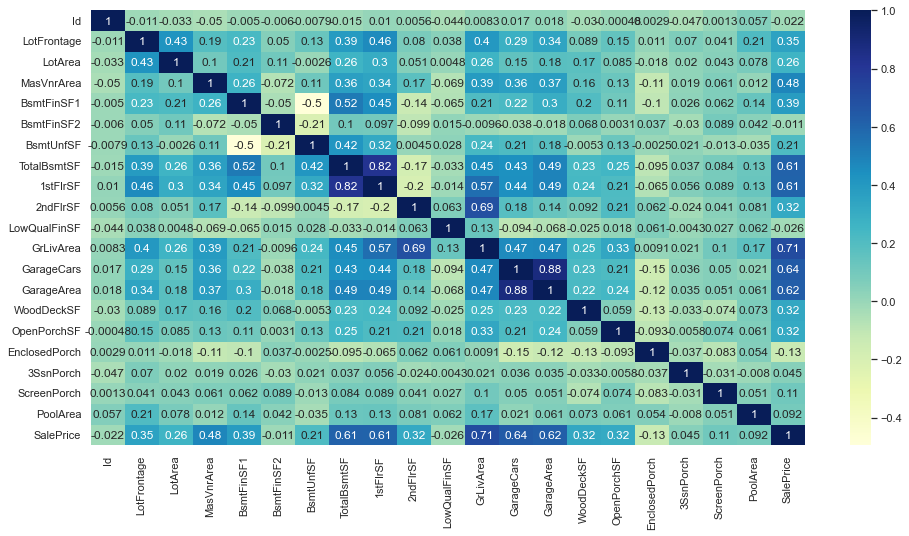

In [16]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of Sale Price with independent variables:
- Price is highly (positively) correlated with GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF (note that all of these variables represent the area of the house)

- Sale Price is negatively correlated to 'Enclosed Porch' variable. More detailed analysis of categorical variables may reveal more insights.

Correlation among independent variables:
- Many independent variables are highly correlated.

Thus, while building the model, we'll have to pay attention to multicollinearity.

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

1. Drop columns (if required)
2. Derive columns
3. Missing value imputation
4. Discard outliers
5. Perform Dummy transformation/encoding

In [17]:
# Drop Columns if the column is filled with NA (NaN) values > 80%

# Columns PoolQC, MiscFeature, Alley and Fence have more than 80% NA values but the meaning of the same is different. 
# Hence need to impute appropriate values in place pf 'NA'.

In [18]:
# Derive age from year columns by keeping year 2010 as the reference year

# Derive AgeBuilt by subtracting 2010 from YearBuilt and drop original columns
house['AgeBuilt'] = 2010 - house['YearBuilt']
house.drop(['YearBuilt'], axis = 1, inplace = True)

# Derive AgeRemodAdd by subtracting 2010 from YearRemodAdd and drop original columns
house['AgeRemodAdd'] = 2010 - house['YearRemodAdd']
house.drop(['YearRemodAdd'], axis = 1, inplace = True)

# Derive GarageAgeBlt by subtracting 2010 from GarageYrBlt and drop original columns
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(2010.0)
house['GarageYrBlt'] = house['GarageYrBlt'].astype(int)
house['GarageAgeBlt'] = 2010 - house['GarageYrBlt']
house.drop(['GarageYrBlt'], axis = 1, inplace = True)

In [19]:
# Missing value imputation

# Replace missing values (NA) in 'LotFrontage' column with zeros
house['LotFrontage'] = house['LotFrontage'].fillna(0)

# Replace NA values in 'Alley' column with text 'NoAlley'
house['Alley'] = house['Alley'].fillna('NoAlley')

# Replace NA values in 'MasVnrType' column with text 'NotAvlb'
house['MasVnrType'] = house['MasVnrType'].fillna('NotAvlb')

# MasVnrArea
house['MasVnrArea'] = house['MasVnrArea'].fillna(0)

# BsmtQual
house['BsmtQual'] = house['BsmtQual'].fillna('NoBsmt')

# BsmtCond
house['BsmtCond'] = house['BsmtCond'].fillna('NoBsmt')

# BsmtExposure
#house['BsmtExposure'] = house['BsmtExposure'].apply(lambda x: 'TA' if (x.BsmtExposure == 'NA' and x.TotalBsmtSF != 0) else 'NA', axis=1)
house['BsmtExposure'] = house['BsmtExposure'].fillna('NoBsmt')

# BsmtFinType1
house['BsmtFinType1'] = house['BsmtFinType1'].fillna('NoBsmt')

# BsmtFinType2
#house['BsmtFinType2'] = house['BsmtFinType2'].apply(lambda x: 'TA' if (x.BsmtExposure == 'NA' and x.TotalBsmtSF != 0) else 'NA', axis=1)
house['BsmtFinType2'] = house['BsmtFinType2'].fillna('NoBsmt')

# Electrical
house['Electrical'] = house['Electrical'].fillna('NotAvlb')

# FireplaceQu
house['FireplaceQu'] = house['FireplaceQu'].fillna('NoFireP')

# GarageType
house['GarageType'] = house['GarageType'].fillna('NoGarage')

# GarageFinish
house['GarageFinish'] = house['GarageFinish'].fillna('NoGarage')

# GarageQual
house['GarageQual'] = house['GarageQual'].fillna('NoGarage')

# GarageCond
house['GarageCond'] = house['GarageCond'].fillna('NoGarage')

# PoolQC
house['PoolQC'] = house['PoolQC'].fillna('NoPool')

# Fence
house['Fence'] = house['Fence'].fillna('NoFence')

# MiscFeature
house['MiscFeature'] = house['MiscFeature'].fillna('None')

In [20]:
# Discard outliers

# Remove outliers from 'SalePrice' column
Q1 = house["SalePrice"].quantile(0.25)
Q3 = house["SalePrice"].quantile(0.75)
IQR = Q3 - Q1
print(Q3)
print(Q1)
print(IQR)

#left, right = left.align(right, axis=1, copy=False)
house = house[~((house["SalePrice"] < (Q1 - 1.5 * IQR)) | (house["SalePrice"] > (Q3 + 1.5 * IQR)))]

# Display the shape of dataframe after removing rows containing outliers in 'SalePrice' column
print(house.shape)  

214000.0
129975.0
84025.0
(1399, 81)


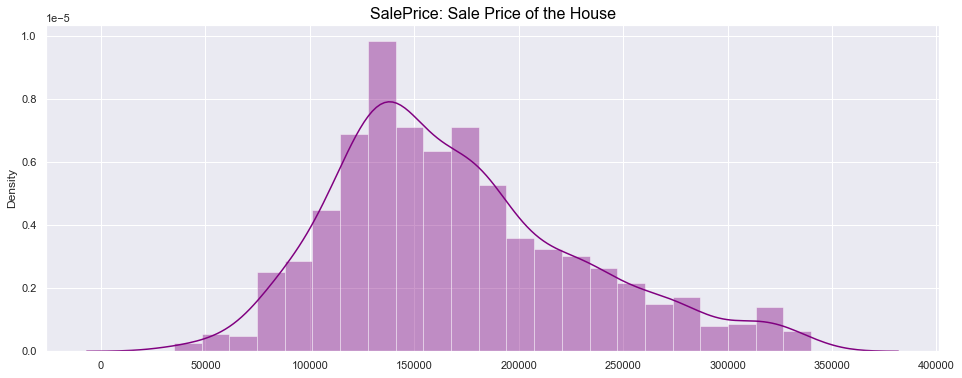

In [21]:
# [Column# 81] SalePrice: Sale Price of the House (target variable) - After removing outliers

plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid", palette="pastel")
plt.title('SalePrice: Sale Price of the House', color='black', fontsize=16)
sns.distplot(house, x=house['SalePrice'], bins=None, color='purple')
plt.show()

In [22]:
# Perform Dummy transformation/encoding for all categorical variables

# MSSubClass

house['MSSubClass'] = house['MSSubClass'].map({'20':'MSSubClass_20', 
                                               '30':'MSSubClass_30', 
                                               '40':'MSSubClass_40', 
                                               '45':'MSSubClass_45',
                                               '50':'MSSubClass_50', 
                                               '60':'MSSubClass_60', 
                                               '70':'MSSubClass_70',
                                               '75':'MSSubClass_75', 
                                               '80':'MSSubClass_80', 
                                               '85':'MSSubClass_85',
                                               '90':'MSSubClass_90',
                                               '120':'MSSubClass_120',
                                               '150':'MSSubClass_150',
                                               '160':'MSSubClass_160',
                                               '180':'MSSubClass_180',
                                               '190':'MSSubClass_190'})

MSSubClass_d = pd.get_dummies(house['MSSubClass'])
house = pd.concat([house, MSSubClass_d], axis = 1)
house.drop(['MSSubClass'], axis = 1, inplace = True)

# MSZoning

house['MSZoning'] = house['MSZoning'].map({'A':'MSZoning_A', 
                                           'C':'MSZoning_C', 
                                           'FV':'MSZoning_FV',
                                           'I':'MSZoning_I', 
                                           'RH':'MSZoning_RH', 
                                           'RL':'MSZoning_RL',
                                           'RP':'MSZoning_RP', 
                                           'RM':'MSZoning_RM'})
MSZoning_d = pd.get_dummies(house['MSZoning'])
house = pd.concat([house, MSZoning_d], axis = 1)
house.drop(['MSZoning'], axis = 1, inplace = True)

# Street

house['Street'] = house['Street'].map({'Grvl':'Street_Grvl', 
                                       'Pave':'Street_Pave'})

Street_d = pd.get_dummies(house['Street'])
house = pd.concat([house, Street_d], axis = 1)
house.drop(['Street'], axis = 1, inplace = True)

# Alley

house['Alley'] = house['Alley'].map({'Grvl':'Alley_Grvl', 
                                     'Pave':'Alley_Pave', 
                                     'NoAlley':'Alley_NoAlley'})

Alley_d = pd.get_dummies(house['Alley'])
house = pd.concat([house, Alley_d], axis = 1)
house.drop(['Alley'], axis = 1, inplace = True)

# LotShape

house['LotShape'] = house['LotShape'].map({'Reg':'LotShape_Reg', 
                                           'IR1':'LotShape_IR1', 
                                           'IR2':'LotShape_IR2',
                                           'IR3':'LotShape_IR3'})

LotShape_d = pd.get_dummies(house['LotShape'])
house = pd.concat([house, LotShape_d], axis = 1)
house.drop(['LotShape'], axis = 1, inplace = True)

# LandContour

house['LandContour'] = house['LandContour'].map({'Lvl':'LandContour_Lvl', 
                                                 'Bnk':'LandContour_Bnk', 
                                                 'HLS':'LandContour_HLS',
                                                 'Low':'LandContour_Low'})

LandContour_d = pd.get_dummies(house['LandContour'])
house = pd.concat([house, LandContour_d], axis = 1)
house.drop(['LandContour'], axis = 1, inplace = True)

# Utilities

house['Utilities'] = house['Utilities'].map({'AllPub':'Utilities_AllPub', 
                                             'NoSewr':'Utilities_NoSewr', 
                                             'NoSeWa':'Utilities_NoSeWa',
                                             'ELO':'Utilities_ELO'})

Utilities_d = pd.get_dummies(house['Utilities'])
house = pd.concat([house, Utilities_d], axis = 1)
house.drop(['Utilities'], axis = 1, inplace = True)

# LotConfig

house['LotConfig'] = house['LotConfig'].map({'Inside':'LotConfig_Inside', 
                                             'Corner':'LotConfig_Corner', 
                                             'CulDSac':'LotConfig_CulDSac',
                                             'FR2':'LotConfig_FR2',
                                             'FR3':'LotConfig_FR3'})

LotConfig_d = pd.get_dummies(house['LotConfig'])
house = pd.concat([house, LotConfig_d], axis = 1)
house.drop(['LotConfig'], axis = 1, inplace = True)

# LandSlope

house['LandSlope'] = house['LandSlope'].map({'Gtl':'LandSlope_Gtl',
                                           'Mod':'LandSlope_Mod', 
                                           'Sev':'LandSlope_Sev'})

LandSlope_d = pd.get_dummies(house['LandSlope'])
house = pd.concat([house, LandSlope_d], axis = 1)
house.drop(['LandSlope'], axis = 1, inplace = True)

# Neighborhood

house['Neighborhood'] = house['Neighborhood'].map({'Blmngtn':'Neighborhood_Blmngtn', 
                                                   'Blueste':'Neighborhood_Blueste', 
                                                   'BrDale':'Neighborhood_BrDale',
                                                   'BrkSide':'Neighborhood_BrkSide',
                                                   'ClearCr':'Neighborhood_ClearCR',
                                                   'CollgCr':'Neighborhood_CollgCr',
                                                   'Crowfor':'Neighborhood_Crowfor',
                                                   'Edwards':'Neighborhood_Edwards',
                                                   'Gilbert':'Neighborhood_Gilbert',
                                                   'IDOTRR':'Neighborhood_IDOTRR',
                                                   'MeadowV':'Neighborhood_MeadowV',
                                                   'Mitchel':'Neighborhood_Mitchel',
                                                   'NAmes':'Neighborhood_Names',
                                                   'NoRidge':'Neighborhood_NoRidge',
                                                   'NPkVill':'Neighborhood_NPkVill',
                                                   'NridgHt':'Neighborhood_NridgHt',
                                                   'NWAmes':'Neighborhood_NWAmes',
                                                   'OldTown':'Neighborhood_OldTown',
                                                   'SWISU':'Neighborhood_SWISU',
                                                   'Sawyer':'Neighborhood_Sawyer',
                                                   'SawyerW':'Neighborhood_SawyerW',
                                                   'Somerst':'Neighborhood_Somerst',
                                                   'StoneBr':'Neighborhood_StoneBr',
                                                   'Timber':'Neighborhood_Timber',
                                                   'Veenker':'Neighborhood_Veenker'})

Neighborhood_d = pd.get_dummies(house['Neighborhood'])
house = pd.concat([house, Neighborhood_d], axis = 1)
house.drop(['Neighborhood'], axis = 1, inplace = True)

# Condition1

house['Condition1'] = house['Condition1'].map({'Artery':'Condition1_Artery', 
                                               'Feedr':'Condition1_Feedr', 
                                               'Norm':'Condition1_Norm',
                                               'RRNn':'Condition1_RRNn',
                                               'RRAn':'Condition1_RRAn',
                                               'PosN':'Condition1_PosN',
                                               'PosA':'Condition1_PosA',
                                               'RRNe':'Condition1_RRNe',
                                               'RRAe':'Condition1_RRAe'})

Condition1_d = pd.get_dummies(house['Condition1'])
house = pd.concat([house, Condition1_d], axis = 1)
house.drop(['Condition1'], axis = 1, inplace = True)

# Condition2

house['Condition2'] = house['Condition2'].map({'Artery':'Condition2_Artery', 
                                               'Feedr':'Condition2_Feedr', 
                                               'Norm':'Condition2_Norm',
                                               'RRNn':'Condition2_RRNn',
                                               'RRAn':'Condition2_RRAn',
                                               'PosN':'Condition2_PosN',
                                               'PosA':'Condition2_PosA',
                                               'RRNe':'Condition2_RRNe',
                                               'RRAe':'Condition2_RRAe'})

Condition2_d = pd.get_dummies(house['Condition2'])
house = pd.concat([house, Condition2_d], axis = 1)
house.drop(['Condition2'], axis = 1, inplace = True)

# BldgType

house['BldgType'] = house['BldgType'].map({'1Fam':'BldgType_1Fam', 
                                           '2FmCon':'BldgType_2FmCon', 
                                           'Duplx':'BldgType_Duplx',
                                           'TwnhsE':'BldgType_TwnhsE',
                                           'TwnhsI':'BldgType_TwnhsI'})

BldgType_d = pd.get_dummies(house['BldgType'])
house = pd.concat([house, BldgType_d], axis = 1)
house.drop(['BldgType'], axis = 1, inplace = True)

# HouseStyle

house['HouseStyle'] = house['HouseStyle'].map({'1Story':'HouseStyle_1Story', 
                                               '1.5Fin':'HouseStyle_1.5Fin', 
                                               '1.5Unf':'HouseStyle_1.5Unf',
                                               '2Story':'HouseStyle_2Story',
                                               '2.5Fin':'HouseStyle_2.5Fin',
                                               '2.5Unf':'HouseStyle_2.5Unf',
                                               'SFoyer':'HouseStyle_SFoyer',
                                               'SLvl':'HouseStyle_SLvl'})

HouseStyle_d = pd.get_dummies(house['HouseStyle'])
house = pd.concat([house, HouseStyle_d], axis = 1)
house.drop(['HouseStyle'], axis = 1, inplace = True)

# OverallQual

house['OverallQual'] = house['OverallQual'].map({'1':'OverallQual_1', 
                                                 '2':'OverallQual_2', 
                                                 '3':'OverallQual_3',
                                                 '4':'OverallQual_4',
                                                 '5':'OverallQual_5',
                                                 '6':'OverallQual_6',
                                                 '7':'OverallQual_7',
                                                 '8':'OverallQual_8',
                                                 '9':'OverallQual_9',
                                                 '10':'OverallQual_10'})

OverallQual_d = pd.get_dummies(house['OverallQual'])
house = pd.concat([house, OverallQual_d], axis = 1)
house.drop(['OverallQual'], axis = 1, inplace = True)

# OverallCond

house['OverallCond'] = house['OverallCond'].map({'1':'OverallCond_1', 
                                                 '2':'OverallCond_2', 
                                                 '3':'OverallCond_3',
                                                 '4':'OverallCond_4',
                                                 '5':'OverallCond_5',
                                                 '6':'OverallCond_6',
                                                 '7':'OverallCond_7',
                                                 '8':'OverallCond_8',
                                                 '9':'OverallCond_9',
                                                 '10':'OverallCond_10'})

OverallCond_d = pd.get_dummies(house['OverallCond'])
house = pd.concat([house, OverallCond_d], axis = 1)
house.drop(['OverallCond'], axis = 1, inplace = True)

# RoofStyle

house['RoofStyle'] = house['RoofStyle'].map({'Flat':'RoofStyle_Flat', 
                                             'Gable':'RoofStyle_Gable', 
                                             'Gambrel':'RoofStyle_Gambrel',
                                             'Hip':'RoofStyle_Hip',
                                             'Mansard':'RoofStyle_Mansard',
                                             'Shed':'RoofStyle_Shed'})

RoofStyle_d = pd.get_dummies(house['RoofStyle'])
house = pd.concat([house, RoofStyle_d], axis = 1)
house.drop(['RoofStyle'], axis = 1, inplace = True)

# RoofMatl

house['RoofMatl'] = house['RoofMatl'].map({'ClyTile':'RoofMatl_ClyTile', 
                                           'CompShg':'RoofMatl_CompShg', 
                                           'Membran':'RoofMatl_Membran',
                                           'Metal':'RoofMatl_Metal',
                                           'Roll':'RoofMatl_Roll',
                                           'Tar&Grv':'RoofMatl_Tar&Grv',
                                           'WdShake':'RoofMatl_WdShake',
                                           'WdShngl':'RoofMatl_WdShngl'})

RoofMatl_d = pd.get_dummies(house['RoofMatl'])
house = pd.concat([house, RoofMatl_d], axis = 1)
house.drop(['RoofMatl'], axis = 1, inplace = True)

# Exterior1st

house['Exterior1st'] = house['Exterior1st'].map({'AsbShng':'Exterior1st_AsbShng', 
                                                 'AsphShnB':'Exterior1st_AsphShn', 
                                                 'BrkComm':'Exterior1st_BrkComm',
                                                 'BrkFace':'Exterior1st_BrkFace',
                                                 'CBlock':'Exterior1st_CBlock',
                                                 'CemntBd':'Exterior1st_CemntBd',
                                                 'HdBoard':'Exterior1st_HdBoard',
                                                 'ImStucc':'Exterior1st_ImStucc',
                                                 'MetalSd':'Exterior1st_MetalSd',
                                                 'Other':'Exterior1st_Other',
                                                 'Plywood':'Exterior1st_Plywood',
                                                 'PreCast':'Exterior1st_PreCast',
                                                 'Stone':'Exterior1st_Stone',
                                                 'Stucco':'Exterior1st_Stucco',
                                                 'VinylSd':'Exterior1st_VinylSd',
                                                 'Wd Sdng':'Exterior1st_WdSdng',
                                                 'WdShing':'Exterior1st_WdShing'})

Exterior1st_d = pd.get_dummies(house['Exterior1st'])
house = pd.concat([house, Exterior1st_d], axis = 1)
house.drop(['Exterior1st'], axis = 1, inplace = True)

# Exterior2nd

house['Exterior2nd'] = house['Exterior2nd'].map({'AsbShng':'Exterior2nd_AsbShng', 
                                                 'AsphShnB':'Exterior2nd_AsphShn', 
                                                 'BrkComm':'Exterior2nd_BrkComm',
                                                 'BrkFace':'Exterior2nd_BrkFace',
                                                 'CBlock':'Exterior2nd_CBlock',
                                                 'CemntBd':'Exterior2nd_CemntBd',
                                                 'HdBoard':'Exterior2nd_HdBoard',
                                                 'ImStucc':'Exterior2nd_ImStucc',
                                                 'MetalSd':'Exterior2nd_MetalSd',
                                                 'Other':'Exterior2nd_Other',
                                                 'Plywood':'Exterior2nd_Plywood',
                                                 'PreCast':'Exterior2nd_PreCast',
                                                 'Stone':'Exterior2nd_Stone',
                                                 'Stucco':'Exterior2nd_Stucco',
                                                 'VinylSd':'Exterior2nd_VinylSd',
                                                 'Wd Sdng':'Exterior2nd_WdSdng',
                                                 'WdShing':'Exterior2nd_WdShing'})

Exterior2nd_d = pd.get_dummies(house['Exterior2nd'])
house = pd.concat([house, Exterior2nd_d], axis = 1)
house.drop(['Exterior2nd'], axis = 1, inplace = True)

# MasVnrType

house['MasVnrType'] = house['MasVnrType'].map({'BrkCmn':'MasVnrType_BrkCmn', 
                                               'BrkFace':'MasVnrType_BrkFace', 
                                               'CBlock':'MasVnrType_CBlock',
                                               'None':'MasVnrType_None',
                                               'Stone':'MasVnrType_Stone',
                                               'NotAvlb':'MasVnrType_NotAvlb'})

MasVnrType_d = pd.get_dummies(house['MasVnrType'])
house = pd.concat([house, MasVnrType_d], axis = 1)
house.drop(['MasVnrType'], axis = 1, inplace = True)

# ExterQual

house['ExterQual'] = house['ExterQual'].map({'Ex':'ExterQual_Ex', 
                                             'Gd':'ExterQual_Gd', 
                                             'TA':'ExterQual_TA',
                                             'Fa':'ExterQual_Fa',
                                             'Po':'ExterQual_Po'})

ExterQual_d = pd.get_dummies(house['ExterQual'])
house = pd.concat([house, ExterQual_d], axis = 1)
house.drop(['ExterQual'], axis = 1, inplace = True)

# ExterCond

house['ExterCond'] = house['ExterCond'].map({'Ex':'ExterCond_Ex', 
                                             'Gd':'ExterCond_Gd', 
                                             'TA':'ExterCond_TA',
                                             'Fa':'ExterCond_Fa',
                                             'Po':'ExterCond_Po'})

ExterCond_d = pd.get_dummies(house['ExterCond'])
house = pd.concat([house, ExterCond_d], axis = 1)
house.drop(['ExterCond'], axis = 1, inplace = True)

# Foundation

house['Foundation'] = house['Foundation'].map({'BrkTil':'Foundation_BrkTil', 
                                               'CBlock':'Foundation_CBlock', 
                                               'PConc':'Foundation_PConc',
                                               'Slab':'Foundation_Slab',
                                               'Stone':'Foundation_Stone',
                                               'Wood':'Foundation_Wood'})

Foundation_d = pd.get_dummies(house['Foundation'])
house = pd.concat([house, Foundation_d], axis = 1)
house.drop(['Foundation'], axis = 1, inplace = True)

# BsmtQual

house['BsmtQual'] = house['BsmtQual'].map({'Ex':'BsmtQual_Ex', 
                                           'Gd':'BsmtQual_Gd', 
                                           'TA':'BsmtQual_TA',
                                           'Fa':'BsmtQual_Fa',
                                           'Po':'BsmtQual_Po',
                                           'NoBsmt':'BsmtQual_NoBsmt'})

BsmtQual_d = pd.get_dummies(house['BsmtQual'])
house = pd.concat([house, BsmtQual_d], axis = 1)
house.drop(['BsmtQual'], axis = 1, inplace = True)

# BsmtCond

house['BsmtCond'] = house['BsmtCond'].map({'Ex':'BsmtCond_Ex', 
                                           'Gd':'BsmtCond_Gd', 
                                           'TA':'BsmtCond_TA',
                                           'Fa':'BsmtCond_Fa',
                                           'Po':'BsmtCond_Po',
                                           'NoBsmt':'BsmtCond_NoBsmt'})

BsmtCond_d = pd.get_dummies(house['BsmtCond'])
house = pd.concat([house, BsmtCond_d], axis = 1)
house.drop(['BsmtCond'], axis = 1, inplace = True)

# BsmtExposure

house['BsmtExposure'] = house['BsmtExposure'].map({'Gd':'BsmtExposure_Gd', 
                                                   'Av':'BsmtExposure_Av', 
                                                   'Mn':'BsmtExposure_Mn',
                                                   'No':'BsmtExposure_No',
                                                   'NoBsmt':'BsmtExposure_NoBsmt'})

BsmtExposure_d = pd.get_dummies(house['BsmtExposure'])
house = pd.concat([house, BsmtExposure_d], axis = 1)
house.drop(['BsmtExposure'], axis = 1, inplace = True)

# BsmtFinType1

house['BsmtFinType1'] = house['BsmtFinType1'].map({'GLQ':'BsmtFinType1_GLQ', 
                                                   'ALQ':'BsmtFinType1_ALQ', 
                                                   'BLQ':'BsmtFinType1_BLQ',
                                                   'Rec':'BsmtFinType1_Rec',
                                                   'LwQ':'BsmtFinType1_LwQ',
                                                   'Unf':'BsmtFinType1_Unf',
                                                   'NoBsmt':'BsmtFinType1_NoBsmt'})

BsmtFinType1_d = pd.get_dummies(house['BsmtFinType1'])
house = pd.concat([house, BsmtFinType1_d], axis = 1)
house.drop(['BsmtFinType1'], axis = 1, inplace = True)

# BsmtFinType2

house['BsmtFinType2'] = house['BsmtFinType2'].map({'GLQ':'BsmtFinType2_GLQ', 
                                                   'ALQ':'BsmtFinType2_ALQ', 
                                                   'BLQ':'BsmtFinType2_BLQ',
                                                   'Rec':'BsmtFinType2_Rec',
                                                   'LwQ':'BsmtFinType2_LwQ',
                                                   'Unf':'BsmtFinType2_Unf',
                                                   'NoBsmt':'BsmtFinType2_NoBsmt'})

BsmtFinType2_d = pd.get_dummies(house['BsmtFinType2'])
house = pd.concat([house, BsmtFinType2_d], axis = 1)
house.drop(['BsmtFinType2'], axis = 1, inplace = True)

# Heating

house['Heating'] = house['Heating'].map({'Floor':'Heating_Floor', 
                                         'GasA':'Heating_GasA', 
                                         'GasW':'Heating_GasW',
                                         'Grav':'Heating_Grav',
                                         'OthW':'Heating_OthW',
                                         'Wall':'Heating_Wall'})

Heating_d = pd.get_dummies(house['Heating'])
house = pd.concat([house, Heating_d], axis = 1)
house.drop(['Heating'], axis = 1, inplace = True)

# HeatingQC

house['HeatingQC'] = house['HeatingQC'].map({'Ex':'HeatingQC_Ex', 
                                             'Gd':'HeatingQC_Gd', 
                                             'TA':'HeatingQC_TA',
                                             'Fa':'HeatingQC_Fa',
                                             'Po':'HeatingQC_Po'})

HeatingQC_d = pd.get_dummies(house['HeatingQC'])
house = pd.concat([house, HeatingQC_d], axis = 1)
house.drop(['HeatingQC'], axis = 1, inplace = True)

# CentralAir

house['CentralAir'] = house['CentralAir'].map({'N':'CentralAir_N', 
                                               'Y':'CentralAir_Y'})

CentralAir_d = pd.get_dummies(house['CentralAir'])
house = pd.concat([house, CentralAir_d], axis = 1)
house.drop(['CentralAir'], axis = 1, inplace = True)

# Electrical

house['Electrical'] = house['Electrical'].map({'SBrkr':'Electrical_SBrkr', 
                                               'FuseA':'Electrical_FuseA', 
                                               'FuseF':'Electrical_FuseF',
                                               'FuseP':'Electrical_FuseP',
                                               'Mix':'Electrical_Mix',
                                               'NA':'Electrical_NotAvlb'})

Electrical_d = pd.get_dummies(house['Electrical'])
house = pd.concat([house, Electrical_d], axis = 1)
house.drop(['Electrical'], axis = 1, inplace = True)

# BsmtFullBath

house['BsmtFullBath'] = house['BsmtFullBath'].map({'0':'BsmtFullBath_0', 
                                                   '1':'BsmtFullBath_1', 
                                                   '2':'BsmtFullBath_2',
                                                   '3':'BsmtFullBath_3'})

BsmtFullBath_d = pd.get_dummies(house['BsmtFullBath'])
house = pd.concat([house, BsmtFullBath_d], axis = 1)
house.drop(['BsmtFullBath'], axis = 1, inplace = True)

# BsmtHalfBath

house['BsmtHalfBath'] = house['BsmtHalfBath'].map({'0':'BsmtHalfBath_0', 
                                                   '1':'BsmtHalfBath_1', 
                                                   '2':'BsmtHalfBath_2'})

BsmtHalfBath_d = pd.get_dummies(house['BsmtHalfBath'])
house = pd.concat([house, BsmtHalfBath_d], axis = 1)
house.drop(['BsmtHalfBath'], axis = 1, inplace = True)

# FullBath

house['FullBath'] = house['FullBath'].map({'0':'FullBath_0', 
                                           '1':'FullBath_1', 
                                           '2':'FullBath_2',
                                           '3':'FullBath_3'})

FullBath_d = pd.get_dummies(house['FullBath'])
house = pd.concat([house, FullBath_d], axis = 1)
house.drop(['FullBath'], axis = 1, inplace = True)

# HalfBath

house['HalfBath'] = house['HalfBath'].map({'0':'HalfBath_0', 
                                           '1':'HalfBath_1', 
                                           '2':'HalfBath_2'})

HalfBath_d = pd.get_dummies(house['HalfBath'])
house = pd.concat([house, HalfBath_d], axis = 1)
house.drop(['HalfBath'], axis = 1, inplace = True)

# BedroomAbvGr

house['BedroomAbvGr'] = house['BedroomAbvGr'].map({'0':'BedroomAbvGr_0', 
                                                   '1':'BedroomAbvGr_1', 
                                                   '2':'BedroomAbvGr_2',
                                                   '3':'BedroomAbvGr_3',
                                                   '4':'BedroomAbvGr_4',
                                                   '5':'BedroomAbvGr_5',
                                                   '6':'BedroomAbvGr_6',
                                                   '7':'BedroomAbvGr_7',
                                                   '8':'BedroomAbvGr_8'})

BedroomAbvGr_d = pd.get_dummies(house['BedroomAbvGr'])
house = pd.concat([house, BedroomAbvGr_d], axis = 1)
house.drop(['BedroomAbvGr'], axis = 1, inplace = True)

# KitchenAbvGr

house['KitchenAbvGr'] = house['KitchenAbvGr'].map({'0':'KitchenAbvGr_0', 
                                                   '1':'KitchenAbvGr_1', 
                                                   '2':'KitchenAbvGr_2',
                                                   '3':'KitchenAbvGr_3'})


KitchenAbvGr_d = pd.get_dummies(house['KitchenAbvGr'])
house = pd.concat([house, KitchenAbvGr_d], axis = 1)
house.drop(['KitchenAbvGr'], axis = 1, inplace = True)

# KitchenQual

house['KitchenQual'] = house['KitchenQual'].map({'Ex':'KitchenQual_Ex', 
                                                 'Gd':'KitchenQual_Gd', 
                                                 'TA':'KitchenQual_TA',
                                                 'Fa':'KitchenQual_Fa',
                                                 'Po':'KitchenQual_Po'})

KitchenQual_d = pd.get_dummies(house['KitchenQual'])
house = pd.concat([house, KitchenQual_d], axis = 1)
house.drop(['KitchenQual'], axis = 1, inplace = True)

# TotRmsAbvGrd

house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].map({'0':'TotRmsAbvGrd_0', 
                                                   '1':'TotRmsAbvGrd_1', 
                                                   '2':'TotRmsAbvGrd_2',
                                                   '3':'TotRmsAbvGrd_3',
                                                   '4':'TotRmsAbvGrd_4',
                                                   '5':'TotRmsAbvGrd_5',
                                                   '6':'TotRmsAbvGrd_6',
                                                   '7':'TotRmsAbvGrd_7',
                                                   '8':'TotRmsAbvGrd_8',
                                                   '9':'TotRmsAbvGrd_9',
                                                   '10':'TotRmsAbvGrd_10',
                                                   '11':'TotRmsAbvGrd_11',
                                                   '12':'TotRmsAbvGrd_12',
                                                   '13':'TotRmsAbvGrd_13',
                                                   '14':'TotRmsAbvGrd_14'})

TotRmsAbvGrd_d = pd.get_dummies(house['TotRmsAbvGrd'])
house = pd.concat([house, TotRmsAbvGrd_d], axis = 1)
house.drop(['TotRmsAbvGrd'], axis = 1, inplace = True)

# Functional

house['Functional'] = house['Functional'].map({'Typ':'Functional_Typ', 
                                               'Min1':'Functional_Min1', 
                                               'Min2':'Functional_Min2',
                                               'Mod':'Functional_Mod',
                                               'Maj1':'Functional_Maj1',
                                               'Maj2':'Functional_Maj2',
                                               'Sev':'Functional_Sev',
                                               'Sal':'Functional_Sal'})

Functional_d = pd.get_dummies(house['Functional'])
house = pd.concat([house, Functional_d], axis = 1)
house.drop(['Functional'], axis = 1, inplace = True)

# Fireplaces

house['Fireplaces'] = house['Fireplaces'].map({'0':'Fireplaces_0', 
                                               '1':'Fireplaces_1', 
                                               '2':'Fireplaces_2',
                                               '3':'Fireplaces_3'})

Fireplaces_d = pd.get_dummies(house['Fireplaces'])
house = pd.concat([house, Fireplaces_d], axis = 1)
house.drop(['Fireplaces'], axis = 1, inplace = True)

# FireplaceQu

house['FireplaceQu'] = house['FireplaceQu'].map({'Ex':'FireplaceQu_Ex', 
                                                 'Gd':'FireplaceQu_Gd', 
                                                 'TA':'FireplaceQu_TA',
                                                 'Fa':'FireplaceQu_Fa',
                                                 'Po':'FireplaceQu_Po',
                                                 'NoFireP':'FireplaceQu_NoFireP'})

FireplaceQu_d = pd.get_dummies(house['FireplaceQu'])
house = pd.concat([house, FireplaceQu_d], axis = 1)
house.drop(['FireplaceQu'], axis = 1, inplace = True)

# GarageType

house['GarageType'] = house['GarageType'].map({'2Types':'GarageType_2Types', 
                                               'Attchd':'GarageType_Attchd', 
                                               'Basment':'GarageType_Basment',
                                               'BuiltIn':'GarageType_BuiltIn',
                                               'CarPort':'GarageType_CarPort',
                                               'Detchd':'GarageType_Detchd',
                                               'NoGarage':'GarageType_NoGarage'})

GarageType_d = pd.get_dummies(house['GarageType'])
house = pd.concat([house, GarageType_d], axis = 1)
house.drop(['GarageType'], axis = 1, inplace = True)

# GarageFinish

house['GarageFinish'] = house['GarageFinish'].map({'Fin':'GarageFinish_Fin', 
                                                   'RFn':'GarageFinish_RFn', 
                                                   'Unf':'GarageFinish_Unf',
                                                   'NoGarage':'GarageFinish_NoGarage'})

GarageFinish_d = pd.get_dummies(house['GarageFinish'])
house = pd.concat([house, GarageFinish_d], axis = 1)
house.drop(['GarageFinish'], axis = 1, inplace = True)

# GarageCars

house['GarageCars'] = house['GarageCars'].map({'0':'GarageCars_0', 
                                               '1':'GarageCars_1', 
                                               '2':'GarageCars_2',
                                               '3':'GarageCars_3',
                                               '4':'GarageCars_4',
                                               'NoGarage':'GarageCars_NoGarage'})

GarageCars_d = pd.get_dummies(house['GarageCars'])
house = pd.concat([house, GarageCars_d], axis = 1)
house.drop(['GarageCars'], axis = 1, inplace = True)

# GarageQual

house['GarageQual'] = house['GarageQual'].map({'Ex':'GarageQual_Ex', 
                                               'Gd':'GarageQual_Gd', 
                                               'TA':'GarageQual_TA',
                                               'Fa':'GarageQual_Fa',
                                               'Po':'GarageQual_Po',
                                               'NoGarage':'GarageQual_NoGarage'})

GarageQual_d = pd.get_dummies(house['GarageQual'])
house = pd.concat([house, GarageQual_d], axis = 1)
house.drop(['GarageQual'], axis = 1, inplace = True)

# GarageCond

house['GarageCond'] = house['GarageCond'].map({'Ex':'GarageCond_Ex', 
                                               'Gd':'GarageCond_Gd', 
                                               'TA':'GarageCond_TA',
                                               'Fa':'GarageCond_Fa',
                                               'Po':'GarageCond_Po',
                                               'NoGarage':'GarageCond_NoGarage'})

GarageCond_d = pd.get_dummies(house['GarageCond'])
house = pd.concat([house, GarageCond_d], axis = 1)
house.drop(['GarageCond'], axis = 1, inplace = True)

# PavedDrive

house['PavedDrive'] = house['PavedDrive'].map({'Y':'PavedDrive_Y', 
                                               'P':'PavedDrive_P', 
                                               'N':'PavedDrive_N'})

PavedDrive_d = pd.get_dummies(house['PavedDrive'])
house = pd.concat([house, PavedDrive_d], axis = 1)
house.drop(['PavedDrive'], axis = 1, inplace = True)

# PoolQC

house['PoolQC'] = house['PoolQC'].map({'Ex':'PoolQC_Ex', 
                                       'Gd':'PoolQC_Gd', 
                                       'TA':'PoolQC_TA',
                                       'Fa':'PoolQC_Fa',
                                       'NoPool':'PoolQC_NoPool'})

PoolQC_d = pd.get_dummies(house['PoolQC'])
house = pd.concat([house, PoolQC_d], axis = 1)
house.drop(['PoolQC'], axis = 1, inplace = True)

# Fence

house['Fence'] = house['Fence'].map({'GdPrv':'Fence_GdPrv', 
                                     'MnPrv':'Fence_MnPrv', 
                                     'GdWo':'Fence_GdWo',
                                     'MnWw':'Fence_MnWw',
                                     'NoFence':'Fence_NoFence'})

Fence_d = pd.get_dummies(house['Fence'])
house = pd.concat([house, Fence_d], axis = 1)
house.drop(['Fence'], axis = 1, inplace = True)

# MiscFeature

house['MiscFeature'] = house['MiscFeature'].map({'Elev':'MiscFeature_Elev', 
                                                 'Gar2':'MiscFeature_Gar2', 
                                                 'Othr':'MiscFeature_Othr',
                                                 'Shed':'MiscFeature_Shed',
                                                 'TenC':'MiscFeature_TenC',
                                                 'None':'MiscFeature_None'})

MiscFeature_d = pd.get_dummies(house['MiscFeature'])
house = pd.concat([house, MiscFeature_d], axis = 1)
house.drop(['MiscFeature'], axis = 1, inplace = True)

# MoSold

house['MoSold'] = house['MoSold'].map({'1':'MoSold_1', 
                                       '2':'MoSold_2', 
                                       '3':'MoSold_3',
                                       '4':'MoSold_4',
                                       '5':'MoSold_5',
                                       '6':'MoSold_6',
                                       '7':'MoSold_7',
                                       '8':'MoSold_8',
                                       '9':'MoSold_9',
                                       '10':'MoSold_10',
                                       '11':'MoSold_11',
                                       '12':'MoSold_12'})

MoSold_d = pd.get_dummies(house['MoSold'])
house = pd.concat([house, MoSold_d], axis = 1)
house.drop(['MoSold'], axis = 1, inplace = True)

# YrSold

house['YrSold'] = house['YrSold'].map({'2006':'YrSold_2006', 
                                       '2007':'YrSold_2007', 
                                       '2008':'YrSold_2008',
                                       '2009':'YrSold_2009',
                                       '2010':'YrSold_2010'})

YrSold_d = pd.get_dummies(house['YrSold'])
house = pd.concat([house, YrSold_d], axis = 1)
house.drop(['YrSold'], axis = 1, inplace = True)

# SaleType

house['SaleType'] = house['SaleType'].map({'WD':'SaleType_WD', 
                                           'CWD':'SaleType_CWD', 
                                           'VWD':'SaleType_VWD',
                                           'New':'SaleType_New',
                                           'COD':'SaleType_COD',
                                           'Con':'SaleType_Con',
                                           'ConLw':'SaleType_ConLw',
                                           'ConLI':'SaleType_ConLI',
                                           'ConLD':'SaleType_ConLD',
                                           'Oth':'SaleType_Oth'})

SaleType_d = pd.get_dummies(house['SaleType'])
house = pd.concat([house, SaleType_d], axis = 1)
house.drop(['SaleType'], axis = 1, inplace = True)

# SaleCondition

house['SaleCondition'] = house['SaleCondition'].map({'Normal':'SaleCondition_Normal', 
                                                     'Abnorml':'SaleCondition_Abnorml', 
                                                     'AdjLand':'SaleCondition_AdjLand',
                                                     'Alloca':'SaleCondition_Alloca',
                                                     'Family':'SaleCondition_Family',
                                                     'Partial':'SaleCondition_Partial'})

SaleCondition_d = pd.get_dummies(house['SaleCondition'])
house = pd.concat([house, SaleCondition_d], axis = 1)
house.drop(['SaleCondition'], axis = 1, inplace = True)


house.shape

(1399, 281)

In [23]:
# Variable formats after data cleaning

house.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1459
Data columns (total 281 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    Id                     1399 non-null   int64  
 1    LotFrontage            1399 non-null   float64
 2    LotArea                1399 non-null   int64  
 3    MasVnrArea             1399 non-null   float64
 4    BsmtFinSF1             1399 non-null   int64  
 5    BsmtFinSF2             1399 non-null   int64  
 6    BsmtUnfSF              1399 non-null   int64  
 7    TotalBsmtSF            1399 non-null   int64  
 8    1stFlrSF               1399 non-null   int64  
 9    2ndFlrSF               1399 non-null   int64  
 10   LowQualFinSF           1399 non-null   int64  
 11   GrLivArea              1399 non-null   int64  
 12   GarageArea             1399 non-null   int64  
 13   WoodDeckSF             1399 non-null   int64  
 14   OpenPorchSF            1399 non-null  

In [24]:
# Sample rows after data cleaning

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

house.head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0   1         65.0     8450       196.0         706           0        150   
1   2         80.0     9600         0.0         978           0        284   
2   3         68.0    11250       162.0         486           0        434   
3   4         60.0     9550         0.0         216           0        540   
4   5         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  AgeBuilt  AgeRemodAdd  GarageAgeBlt  MSZoning_FV  \
0        0     208500         7            7             7            0   
1        0     181500        34           34            34            0   
2        0     223500         9            8             9            0   
3        0     140000        95           40            12            0   
4        0     250000        10           10            10            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  \
0            0            1            0            0            1   
1            0            1            0            0            1   
2            0            1            0            0            1   
3            0            1            0            0            1   
4            0            1            0            0            1   

   Alley_Grvl  Alley_NoAlley  Alley_Pave  LotShape_IR1  LotShape_IR2  \
0           0              1           0             0             0   
1           0              1           0             0             0   
2           0              1           0             1             0   
3           0              1           0             1             0   
4           0              1           0             1             0   

   LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Low  LandContour_Lvl  Utilities_AllPub  Utilities_NoSeWa  \
0                0                1                 1                 0   
1                0                1                 1                 0   
2                0                1                 1                 0   
3                0                1                 1                 0   
4                0                1                 1                 0   

   LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 1                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Ins

In [25]:
# All numeric (float and int) variables in the dataset

house_numeric = house.select_dtypes(include=['float64', 'int64', 'uint8'])
house_numeric.head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0   1         65.0     8450       196.0         706           0        150   
1   2         80.0     9600         0.0         978           0        284   
2   3         68.0    11250       162.0         486           0        434   
3   4         60.0     9550         0.0         216           0        540   
4   5         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  AgeBuilt  AgeRemodAdd  GarageAgeBlt  MSZoning_FV  \
0        0     208500         7            7             7            0   
1        0     181500        34           34            34            0   
2        0     223500         9            8             9            0   
3        0     140000        95           40            12            0   
4        0     250000        10           10            10            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  \
0            0            1            0            0            1   
1            0            1            0            0            1   
2            0            1            0            0            1   
3            0            1            0            0            1   
4            0            1            0            0            1   

   Alley_Grvl  Alley_NoAlley  Alley_Pave  LotShape_IR1  LotShape_IR2  \
0           0              1           0             0             0   
1           0              1           0             0             0   
2           0              1           0             1             0   
3           0              1           0             1             0   
4           0              1           0             1             0   

   LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Low  LandContour_Lvl  Utilities_AllPub  Utilities_NoSeWa  \
0                0                1                 1                 0   
1                0                1                 1                 0   
2                0                1                 1                 0   
3                0                1                 1                 0   
4                0                1                 1                 0   

   LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 1                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Ins

In [26]:
# correlation matrix

cor = house_numeric.corr()
cor

Id  LotFrontage   LotArea  MasVnrArea  \
Id                     1.000000    -0.006237 -0.015152   -0.050471   
LotFrontage           -0.006237     1.000000  0.062733    0.053104   
LotArea               -0.015152     0.062733  1.000000    0.090614   
MasVnrArea            -0.050471     0.053104  0.090614    1.000000   
BsmtFinSF1            -0.000520     0.037457  0.203555    0.213219   
BsmtFinSF2            -0.002935    -0.012364  0.057139   -0.060459   
BsmtUnfSF             -0.006280     0.157734  0.014446    0.084789   
TotalBsmtSF           -0.008345     0.200877  0.252314    0.289698   
1stFlrSF               0.017611     0.214635  0.307689    0.261206   
2ndFlrSF               0.010839     0.017853  0.047520    0.125750   
LowQualFinSF          -0.037039     0.050246 -0.001544   -0.067856   
GrLivArea              0.018956     0.180195  0.270307    0.297826   
GarageArea             0.029600     0.162745  0.183981    0.297762   
WoodDeckSF            -0.024522    -0.038465  0.174801    0.106240   
OpenPorchSF            0.004464     0.046948  0.102608    0.111861   
EnclosedPorch          0.005792     0.036262 -0.009359   -0.113757   
3SsnPorch             -0.067449     0.020173  0.031653    0.015367   
ScreenPorch            0.008969     0.018613  0.042003    0.069776   
PoolArea               0.050732     0.097599  0.098440    0.026999   
MiscVal               -0.006998    -0.058404  0.050528   -0.026690   
SalePrice             -0.011984     0.132599  0.249812    0.350541   
AgeBuilt               0.008484    -0.003044 -0.001485   -0.280006   
AgeRemodAdd            0.017613    -0.051980 -0.012715   -0.126740   
GarageAgeBlt          -0.001192    -0.007604  0.064959   -0.156597   
MSZoning_FV           -0.013214    -0.030428 -0.093566    0.060734   
MSZoning_RH            0.032301    -0.026808 -0.035870   -0.021566   
MSZoning_RL            0.034949     0.112400  0.230603    0.064141   
MSZoning_RM           -0.035843    -0.110769 -0.197611   -0.091002   
Street_Grvl           -0.009551     0.028220  0.244330   -0.014319   
Street_Pave            0.009551    -0.028220 -0.244330    0.014319   
Alley_Grvl             0.001089     0.009085 -0.028288   -0.087363   
Alley_NoAlley          0.001182     0.034857  0.081303    0.035749   
Alley_Pave            -0.002927    -0.060965 -0.087739    0.043887   
LotShape_IR1          -0.027992    -0.175016  0.126681    0.096164   
LotShape_IR2          -0.024232    -0.046148  0.241763   -0.028652   
LotShape_IR3           0.053908     0.081140  0.114677   -0.000648   
LotShape_Reg           0.026286     0.172703 -0.221795   -0.084626   
LandContour_Bnk        0.013790     0.062364  0.043880   -0.049998   
LandContour_HLS        0.015503     0.083262  0.101712   -0.009792   
LandContour_Low        0.001611    -0.097374  0.323472   -0.019939   
LandContour_Lvl       -0.019192    -0.040182 -0.255100    0.050608   
Utilities_AllPub      -0.013383     0.044006 -0.013562   -0.075831   
Utilities_NoSeWa       0.013383    -0.044006  0.013562    0.075831   
LotConfig_Corner      -0.058689     0.090894  0.066759    0.014506   
LotConfig_CulDSac     -0.008891    -0.229911  0.192866    0.005976   
LotConfig_FR2          0.008256    -0.069598  0.004399    0.017166   
LotConfig_FR3          0.017672     0.022374 -0.009324    0.005980   
LotConfig_Inside       0.049867     0.069858 -0.161306   -0.023211   
LandSlope_Gtl         -0.015162     0.019945 -0.307535    0.022980   
LandSlope_Mod          0.027536     0.020035  0.108154   -0.023669   
LandSlope_Sev         -0.024411    -0.092464  0.502150   -0.003005   
Neighborhood_Blmngtn   0.010610    -0.056919 -0.090056   -0.030756   
Neighborhood_Blueste   0.004028    -0.035774 -0.038785   -0.021330   
Neighborhood_BrDale   -0.003645    -0.109341 -0.107979    0.147210   
Neighborhood_BrkSide   0.000598    -0.035496 -0.069846   -0.107575   
Neighborhood_ClearCR  -0.043475    -0.073647  0.355828   -0.004628   
Neighborhood_CollgCr  -0.004340     0.0

In [27]:
# Convert correlation matrix to 1-D Series and sort
sorted_mat = cor['SalePrice'].sort_values(ascending=False)
  
print(sorted_mat)

SalePrice                1.000000
GrLivArea                0.661325
GarageArea               0.607230
ExterQual_Gd             0.588472
TotalBsmtSF              0.543508
1stFlrSF                 0.522785
Foundation_PConc         0.521064
KitchenQual_Gd           0.486470
HeatingQC_Ex             0.447140
GarageType_Attchd        0.424074
BsmtFinType1_GLQ         0.420041
BsmtQual_Gd              0.413615
GarageFinish_Fin         0.375089
BsmtQual_Ex              0.371501
MasVnrArea               0.350541
Exterior1st_VinylSd      0.344606
Exterior2nd_VinylSd      0.343346
OpenPorchSF              0.325791
FireplaceQu_Gd           0.320824
GarageCond_TA            0.320106
2ndFlrSF                 0.317358
KitchenQual_Ex           0.316517
WoodDeckSF               0.302339
CentralAir_Y             0.296189
Neighborhood_NridgHt     0.293159
BsmtFinSF1               0.290377
GarageQual_TA            0.287489
MasVnrType_Stone         0.284478
Neighborhood_NoRidge     0.280395
HouseStyle_2St

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [28]:
house.shape

(1399, 281)

In [29]:
# split into X and y

#y = house.pop('SalePrice')
#X = house

X = house.loc[:, ['GrLivArea',
                'GarageArea',
                'ExterQual_Gd',
                'TotalBsmtSF',
                '1stFlrSF',
                'Foundation_PConc',
                'KitchenQual_Gd',
                'HeatingQC_Ex',
                'GarageType_Attchd',
                'BsmtFinType1_GLQ',
                'BsmtQual_Gd',
                'GarageFinish_Fin',
                'BsmtQual_Ex',
                'MasVnrArea',
                'Exterior1st_VinylSd',
                'Exterior2nd_VinylSd',
                'OpenPorchSF',
                'FireplaceQu_Gd',
                'GarageCond_TA',
                '2ndFlrSF',
                'KitchenQual_Ex',
                'WoodDeckSF',
                'CentralAir_Y',
                'Neighborhood_NridgHt',
                'HouseStyle_2Story',
                'Electrical_SBrkr',
                'GarageFinish_RFn',
                'MSZoning_RL',
                'PavedDrive_Y',
                'LotShape_IR1',
                'LotArea',
                'FireplaceQu_TA',
                'SaleType_New',
                'SaleCondition_Partial',
                'ExterQual_Ex',
                'MasVnrType_BrkFace',
                'BsmtUnfSF',
                'Neighborhood_Somerst',
                'BsmtExposure_Gd',
                'GarageType_BuiltIn',
                'Fence_NoFence',
                'Neighborhood_Timber',
                'FireplaceQu_Ex',
                'MSZoning_FV',
                'Neighborhood_CollgCr',
                'BsmtExposure_Av',
                'LotConfig_CulDSac',
                'LotFrontage',
                'Functional_Typ',
                'Neighborhood_StoneBr',
                'Alley_NoAlley',
                'BldgType_1Fam',
                'ExterCond_TA',
                'Heating_GasA',
                'BsmtFinType2_Unf',
                'RoofStyle_Hip',
                'BsmtCond_Gd',
                'BsmtCond_TA',
                  'Heating_Grav',
                  'Exterior2nd_AsbShng',
                  'Fence_GdWo',
                  'Condition1_Feedr',
                  'RoofStyle_Gable',
                  'Neighborhood_BrDale',
                  'HeatingQC_Gd',
                  'Exterior1st_AsbShng',
                  'BsmtFinType1_BLQ',
                  'SaleType_WD',
                  'Condition1_Artery',
                  'Neighborhood_Sawyer',
                  'Neighborhood_MeadowV',
                  'BsmtFinType1_Rec',
                  'SaleCondition_Abnorml',
                  'ExterQual_Fa',
                  'Foundation_Slab',
                  'EnclosedPorch',
                  'BsmtQual_Fa',
                  'Electrical_FuseF',
                  'GarageQual_Fa',
                  'HeatingQC_Fa',
                  'BsmtCond_Fa',
                  'GarageCond_Fa',
                  'Alley_Grvl',
                  'Fence_MnPrv',
                  'Neighborhood_BrkSide',
                  'ExterCond_Fa',
                  'Exterior2nd_MetalSd',
                  'BsmtFinType2_NoBsmt',
                  'Exterior1st_MetalSd',
                  'Exterior2nd_WdSdng',
                  'BsmtExposure_NoBsmt',
                  'HouseStyle_1.5Fin',
                  'BsmtFinType1_NoBsmt',
                  'BsmtCond_NoBsmt',
                  'BsmtQual_NoBsmt',
                  'Exterior1st_WdSdng',
                  'BsmtExposure_No',
                  'KitchenQual_Fa',
                  'Neighborhood_Names',
                  'Neighborhood_IDOTRR',
                  'Neighborhood_Edwards',
                  'Electrical_FuseA',
                  'Neighborhood_OldTown',
                  'Foundation_BrkTil',
                  'PavedDrive_N',
                  'GarageType_NoGarage',
                  'GarageQual_NoGarage',
                  'GarageCond_NoGarage',
                  'GarageFinish_NoGarage',
                  'LotShape_Reg',
                  'CentralAir_N',
                  'HeatingQC_TA',
                  'MSZoning_RM',
                  'Foundation_CBlock',
                  'MasVnrType_None',
                  'GarageAgeBlt',
                  'GarageType_Detchd',
                  'GarageFinish_Unf',
                  'BsmtQual_TA',
                  'FireplaceQu_NoFireP',
                  'AgeRemodAdd',
                  'KitchenQual_TA',
                  'AgeBuilt',
                  'ExterQual_TA']] # predictors in variable X

y = house['SalePrice'] # response variable in Y

In [30]:
X.shape

(1399, 124)

In [31]:
y.shape

(1399,)

In [32]:
# scaling the features - necessary before using Ridge or Lasso

from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['GrLivArea', 'GarageArea', 'ExterQual_Gd', 'TotalBsmtSF', '1stFlrSF',
       'Foundation_PConc', 'KitchenQual_Gd', 'HeatingQC_Ex',
       'GarageType_Attchd', 'BsmtFinType1_GLQ',
       ...
       'MasVnrType_None', 'GarageAgeBlt', 'GarageType_Detchd',
       'GarageFinish_Unf', 'BsmtQual_TA', 'FireplaceQu_NoFireP', 'AgeRemodAdd',
       'KitchenQual_TA', 'AgeBuilt', 'ExterQual_TA'],
      dtype='object', length=124)

In [33]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(979, 124)
(420, 124)
(979,)
(420,)


## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting sale prices of houses, a dataset using linear regression.

In [35]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [36]:
X_train.shape

(979, 124)

In [37]:
y_train.shape

(979,)

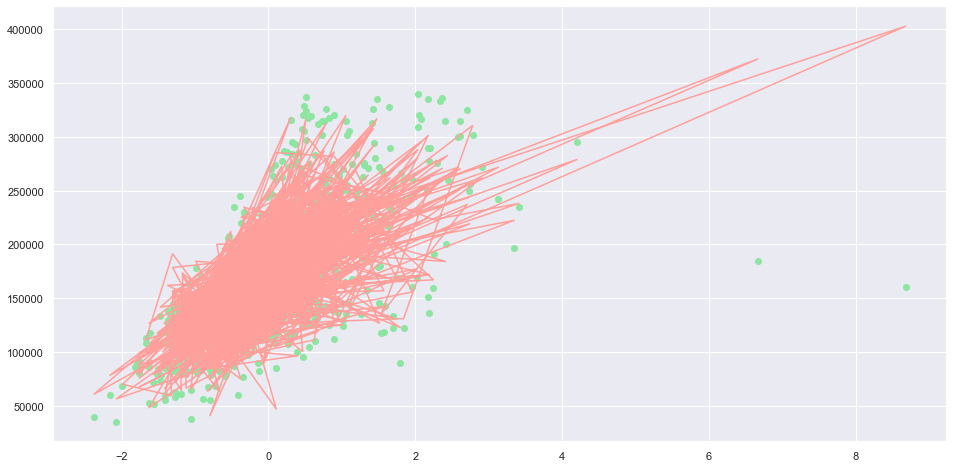

In [38]:
# Plotting the OLS (Ordinary Least Squares) Linear Regression model

plt.figure(figsize=(16,8))

plt.scatter(X_train.iloc[:,0].values, y_train, color='g')
plt.plot(X_train.iloc[:,0].values, lm.predict(X_train), color='r')
         
plt.show()

In [39]:
# Print the coefficients and intercept

print(lm.intercept_)
print(lm.coef_)

-62405993455425.42
[-7.67625291e+02  8.21173917e+03  6.19031981e+15 -1.36614910e+03
  1.48892536e+04  1.46082054e+03 -1.14862545e+16  9.07010573e+03
  4.97573189e+03  4.12625000e+03  3.38558077e+09  6.02938718e+15
  1.54924048e+09 -1.35875000e+03 -5.76962500e+03  6.33987500e+03
  1.29283984e+03  2.51037500e+03  7.67500000e+02  2.22180000e+04
 -4.81762216e+15  2.25531250e+03 -2.96011342e+15  5.21693750e+03
 -5.30800000e+03 -2.41175000e+03  6.62631256e+15  8.00087500e+03
  1.17500000e+03  3.38406250e+03  1.01250000e+03  2.03125000e+03
  7.17677971e+15 -7.28574942e+15  1.71198434e+15  0.00000000e+00
  4.96500000e+02  4.67218750e+03  3.08800000e+03 -6.27500000e+02
  3.17500000e+02  1.48025000e+03  1.46137500e+03  2.65593750e+03
 -1.10625000e+03 -9.45500000e+02  1.56829688e+03 -1.55450000e+03
  3.68337500e+03  2.41862500e+03  7.92500000e+01  6.09750000e+03
  1.05023438e+03  9.61250000e+01 -8.79500000e+02 -2.69125000e+02
  7.63509375e+03  8.83112500e+03 -5.35625000e+02  5.84187500e+02
 -8.17

In [40]:
from sklearn.metrics import r2_score, mean_squared_error

In [41]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8504849354146317
-1.6196343190736724e+21
493959251007.65546
2.540778343656139e+33
504554903.9914765
6.049472246800331e+30


## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [42]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [43]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 100}


In [44]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised

alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
coefs = ridge.coef_
print(coefs)

[ 9.57210603e+03  6.60627341e+03  3.40556843e+03  1.10472697e+03
  5.06063173e+03  5.63776334e+02  1.28212093e+03  1.29928264e+03
  2.28196532e+03  3.55258627e+03  9.74672755e+02  8.75874338e+02
  3.76403821e+03 -3.25525626e+02 -7.91874461e+02  1.23050113e+03
  1.60184936e+03  2.59160825e+03  2.60082568e+02  7.59448458e+03
  4.67544783e+03  2.15857795e+03  4.89469560e+02  4.45515785e+03
 -8.10102064e+02 -4.38043268e+01 -1.00935325e+02  2.80496207e+03
  9.76801726e+02  1.36873348e+03  1.30617927e+03  1.85851626e+03
 -1.63255491e+03 -1.60813751e+03  2.34695517e+02  5.67787384e+02
  2.90383037e+02  3.39000109e+03  2.73714626e+03 -9.61729016e+02
  4.57019951e+00  1.40670065e+03  1.84599695e+03  9.20486219e+02
 -1.01856304e+03 -7.19721055e+02  1.51174076e+03 -9.93078073e+02
  3.00348439e+03  2.10197562e+03  2.20822594e+02  5.14133852e+03
  4.18165368e+02 -1.88122457e+02 -7.79078829e+02  1.62851272e+02
  1.99466308e+03  8.67060003e+02 -6.57619299e+02 -1.64037402e+02
 -9.19784316e+02 -2.20774

In [45]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8447328905907366
0.8364460020786795
512962525098.14923
256573012218.30304
523965807.0461177
610888124.3292929


## Lasso

In [46]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 1000}


In [48]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1000)

In [49]:
lasso.coef_

array([19069.064736  ,  6475.52172118,  5241.9447086 ,  1075.13343926,
           0.        ,     0.        ,     0.        ,  1387.74965066,
        2962.40887069,  4127.9449144 ,  2602.96683277,   191.69509834,
        4873.34134743,     0.        ,    -0.        ,     0.        ,
         706.47015701,   452.92813128,     0.        ,     0.        ,
        4031.79643982,  1814.3864069 ,   265.01829407,  3987.58304261,
          -0.        ,     0.        ,     0.        ,  1574.71822825,
         349.31634081,   541.34667444,     0.        ,     0.        ,
        -401.4790155 ,    -0.        ,     0.        ,     0.        ,
          -0.        ,  2988.64135637,  2853.65990382,    -0.        ,
           0.        ,   823.12965285,   205.23634643,     0.        ,
          -0.        ,     0.        ,  1194.24826449,  -496.16541827,
        2712.82298461,  1234.02906215,     0.        ,  4119.90832908,
           0.        ,     0.        ,    -0.        ,     0.        ,
      

In [50]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8299931281099022
0.8356534736687844
561658902652.1753
257816279909.58383
573706744.2820994
613848285.4990091


In [51]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.504849e-01      8.447329e-01      8.299931e-01
1   R2 Score (Test)      -1.619634e+21      8.364460e-01      8.356535e-01
2       RSS (Train)       4.939593e+11      5.129625e+11      5.616589e+11
3        RSS (Test)       2.540778e+33      2.565730e+11      2.578163e+11
4       MSE (Train)       2.246230e+04      2.289030e+04      2.395218e+04
5        MSE (Test)       2.459567e+15      2.471615e+04      2.477596e+04

## Lets observe the changes in the coefficients after regularization

In [52]:
betas = pd.DataFrame(index=X.columns)

In [53]:
betas.rows = X.columns

In [54]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [55]:
pd.set_option('display.max_rows', None)
betas.head(68)

Linear        Ridge         Lasso
GrLivArea             -7.676253e+02  9572.106029  19069.064736
GarageArea             8.211739e+03  6606.273412   6475.521721
ExterQual_Gd           6.190320e+15  3405.568427   5241.944709
TotalBsmtSF           -1.366149e+03  1104.726966   1075.133439
1stFlrSF               1.488925e+04  5060.631733      0.000000
Foundation_PConc       1.460821e+03   563.776334      0.000000
KitchenQual_Gd        -1.148625e+16  1282.120926      0.000000
HeatingQC_Ex           9.070106e+03  1299.282643   1387.749651
GarageType_Attchd      4.975732e+03  2281.965324   2962.408871
BsmtFinType1_GLQ       4.126250e+03  3552.586269   4127.944914
BsmtQual_Gd            3.385581e+09   974.672755   2602.966833
GarageFinish_Fin       6.029387e+15   875.874338    191.695098
BsmtQual_Ex            1.549240e+09  3764.038214   4873.341347
MasVnrArea            -1.358750e+03  -325.525626      0.000000
Exterior1st_VinylSd   -5.769625e+03  -791.874461     -0.000000
Exterior2nd_VinylSd    6.339875e+03  1230.501134      0.000000
OpenPorchSF            1.292840e+03  1601.849359    706.470157
FireplaceQu_Gd         2.510375e+03  2591.608252    452.928131
GarageCond_TA          7.675000e+02   260.082568      0.000000
2ndFlrSF               2.221800e+04  7594.484576      0.000000
KitchenQual_Ex        -4.817622e+15  4675.447831   4031.796440
WoodDeckSF             2.255312e+03  2158.577948   1814.386407
CentralAir_Y          -2.960113e+15   489.469560    265.018294
Neighborhood_NridgHt   5.216938e+03  4455.157847   3987.583043
HouseStyle_2Story     -5.308000e+03  -810.102064     -0.000000
Electrical_SBrkr      -2.411750e+03   -43.804327      0.000000
GarageFinish_RFn       6.626313e+15  -100.935325      0.000000
MSZoning_RL            8.000875e+03  2804.962069   1574.718228
PavedDrive_Y           1.175000e+03   976.801726    349.316341
LotShape_IR1           3.384062e+03  1368.733482    541.346674
LotArea                1.012500e+03  1306.179271      0.000000
FireplaceQu_TA         2.031250e+03  1858.516263      0.000000
SaleType_New           7.176780e+15 -1632.554910   -401.479016
SaleCondition_Partial -7.285749e+15 -1608.137513     -0.000000
ExterQual_Ex           1.711984e+15   234.695517      0.000000
MasVnrType_BrkFace     0.000000e+00   567.787384      0.000000
BsmtUnfSF              4.965000e+02   290.383037     -0.000000
Neighborhood_Somerst   4.672188e+03  3390.001092   2988.641356
BsmtExposure_Gd        3.088000e+03  2737.146258   2853.659904
GarageType_BuiltIn    -6.275000e+02  -961.729016     -0.000000
Fence_NoFence          3.175000e+02     4.570200      0.000000
Neighborhood_Timber    1.480250e+03  1406.700654    823.129653
FireplaceQu_Ex         1.461375e+03  1845.996953    205.236346
MSZoning_FV            2.655938e+03   920.486219      0.000000
Neighborhood_CollgCr  -1.106250e+03 -1018.563040     -0.000000
BsmtExposure_Av       -9.455000e+02  -719.721055      0.000000
LotConfig_CulDSac      1.568297e+03  1511.740764   1194.248264
LotFrontage           -1.554500e+03  -993.078073   -496.165418
Functional_Typ         3.683375e+03  3003.484393   2712.822985
Neighborhood_StoneBr   2.418625e+03  2101.975624   1234.029062
Alley_NoAlley          7.925000e+01   220.822594      0.000000
BldgType_1Fam          6.097500e+03  5141.338519   4119.908329
ExterCond_TA           1.050234e+03   418.165368      0.000000
Heating_GasA           9.612500e+01  -188.122457      0.000000
BsmtFinType2_Unf      -8.795000e+02  -779.078829     -0.000000
RoofStyle_Hip         -2.691250e+02   162.851272      0.000000
BsmtCond_Gd            7.635094e+03  1994.663080    680.494212
BsmtCond_TA            8.831125e+03   867.060003      0.000000
Heating_Grav          -5.356250e+02  -657.619299     -0.000000
Exterior2nd_AsbShng    5.841875e+02  -164.037402     -0.000000
Fence_GdWo            -8.173750e+02  -919.784316   -382.852755
Condition1_Feedr      -2.465375e+03 -2207.742732  -1609.472989
RoofStyle_Gable       -2.797875e+03 -2095.265982  -1735.5623